# BLOC 4 : Analyse du Marché Immobilier - Département de l'Ain (6 heures)

La Direction Départementale des Territoires (DDT) de l'Ain vous a recruté en tant que Data Analyst pour créer un tableau de bord interactif destiné aux collectivités locales et aux professionnels de l'immobilier. Ce tableau de bord servira à mieux comprendre les dynamiques du marché immobilier local et à orienter les politiques d'aménagement du territoire.

La DDT dispose d'une base de données exhaustive des transactions immobilières (données DVF - Demandes de Valeurs Foncières) couvrant les trois dernières années. Ces données comprennent :

* Informations sur la transaction
  - Identifiant unique
  - Date de mutation
  - Nature de la mutation
  - Valeur foncière (prix de vente)

* Localisation précise du bien
  - Adresse complète (numéro, type de voie, nom de voie)
  - Code postal
  - Commune
  - Code département
  - Références cadastrales (section, numéro de plan)

* Caractéristiques du bien
  - Type de local (appartement, maison, dépendance)
  - Surface réelle bâtie
  - Nombre de pièces principales
  - Surface Carrez (pour les copropriétés)
  - Nature et surface du terrain
  - Nombre de lots

Votre mission est de créer un tableau de bord interactif complet qui permettra aux utilisateurs d'analyser :

* L'évolution des prix
  - Prix moyen par commune
  - Prix au m² par type de bien
  - Tendances temporelles des transactions

* La typologie des biens
  - Répartition par type de local
  - Distribution des surfaces
  - Analyse des terrains non bâtis

* Les dynamiques territoriales
  - Nombre de transactions par commune
  - Cartographie des prix
  - Identification des zones de tension

Le tableau de bord devra répondre à des questions stratégiques telles que :

* Quelles sont les communes les plus dynamiques en termes de transactions ?
* Comment évoluent les prix selon les typologies de biens ?
* Existe-t-il des disparités significatives entre les différents secteurs du département ?
* Quel est le profil type des biens vendus par commune ?
* Quelles sont les tendances du marché des terrains non bâtis ?

En complément du tableau de bord, vous devrez produire :

1. Une méthodologie détaillée de traitement des données
   - Nettoyage des valeurs aberrantes
   - Harmonisation des types de biens
   - Traitement des données cadastrales

2. Une analyse approfondie incluant
   - Les tendances majeures du marché
   - Les spécificités territoriales identifiées
   - Les recommandations pour les politiques locales de l'habitat

3. Un guide d'utilisation destiné aux utilisateurs finaux
   - Présentation des différentes fonctionnalités
   - Exemples de cas d'usage
   - Précautions d'interprétation

Ce projet permettra aux acteurs locaux de :
- Mieux comprendre les dynamiques du marché immobilier local
- Adapter les politiques d'urbanisme aux réalités du territoire
- Anticiper les évolutions du marché
- Identifier les zones nécessitant une attention particulière

Points d'attention particuliers :
- La qualité variable des données cadastrales
- La nécessité de croiser les données avec d'autres sources (PLU, zonages...)
- L'importance de la dimension temporelle dans l'analyse
- La confidentialité des données individuelles

Votre analyse devra être accessible aux non-spécialistes tout en conservant la rigueur nécessaire à la prise de décision.

# 1. **Fusion des tables en une seule**

## **Préparation des données**

## Données 2024 (1er semestre)

In [2]:
import pandas as pd

df_2024 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/1dc47de2-b30a-4497-b9ef-448d054b5a4f',
                 sep='|',                # Séparateur |
                 encoding='latin-1',     # Encodage pour les caractères français
                 compression='zip',      # Spécifie que c'est un fichier zip
                 low_memory=False)       # Pour éviter les warnings de memory

df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566643 entries, 0 to 1566642
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Identifiant de document     0 non-null        float64
 1   Reference document          0 non-null        float64
 2   1 Articles CGI              0 non-null        float64
 3   2 Articles CGI              0 non-null        float64
 4   3 Articles CGI              0 non-null        float64
 5   4 Articles CGI              0 non-null        float64
 6   5 Articles CGI              0 non-null        float64
 7   No disposition              1566643 non-null  int64  
 8   Date mutation               1566643 non-null  object 
 9   Nature mutation             1566643 non-null  object 
 10  Valeur fonciere             1549589 non-null  object 
 11  No voie                     946773 non-null   float64
 12  B/T/Q                       67087 non-null    object 
 1

In [3]:
df_2024.isnull().sum()

Identifiant de document       1566643
Reference document            1566643
1 Articles CGI                1566643
2 Articles CGI                1566643
3 Articles CGI                1566643
4 Articles CGI                1566643
5 Articles CGI                1566643
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 17054
No voie                        619870
B/T/Q                         1499556
Type de voie                   653751
Code voie                        8201
Voie                             8232
Code postal                      8485
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            1491406
Section                            46
No plan                             0
No Volume                     1563018
1er lot                       1102418
Surface Carrez du 1er lot     1431333
2eme lot    

In [4]:
df_2024.columns = df_2024.columns.str.replace(' ', '_')

In [5]:
df_2024 = df_2024[df_2024['Code_departement'] == '01']
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18569 entries, 0 to 18568
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant_de_document     0 non-null      float64
 1   Reference_document          0 non-null      float64
 2   1_Articles_CGI              0 non-null      float64
 3   2_Articles_CGI              0 non-null      float64
 4   3_Articles_CGI              0 non-null      float64
 5   4_Articles_CGI              0 non-null      float64
 6   5_Articles_CGI              0 non-null      float64
 7   No_disposition              18569 non-null  int64  
 8   Date_mutation               18569 non-null  object 
 9   Nature_mutation             18569 non-null  object 
 10  Valeur_fonciere             18372 non-null  object 
 11  No_voie                     8259 non-null   float64
 12  B/T/Q                       487 non-null    object 
 13  Type_de_voie                7833 non

In [ ]:
# df_2024 = df_2024.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 'Nature_culture_speciale', 
#                        'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Identifiant_local'], axis=1)

## Données 2023 (Année complète)

In [7]:
df_2023 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/dd516f7a-91bb-4cad-a63c-4b55cd457f4c',
                 sep='|',                # Séparateur |
                 encoding='latin-1',     # Encodage pour les caractères français
                 compression='zip',      # Spécifie que c'est un fichier zip
                 low_memory=False)       # Pour éviter les warnings de memory

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799407 entries, 0 to 3799406
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [8]:
df_2023.columns = df_2023.columns.str.replace(' ', '_')
df_2023 = df_2023[df_2023['Code_departement'] == '01']
# df_2023 = df_2023.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 'Nature_culture_speciale', 
#                        'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Identifiant_local'], axis=1)
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44247 entries, 0 to 44246
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant_de_document     0 non-null      float64
 1   Reference_document          0 non-null      float64
 2   1_Articles_CGI              0 non-null      float64
 3   2_Articles_CGI              0 non-null      float64
 4   3_Articles_CGI              0 non-null      float64
 5   4_Articles_CGI              0 non-null      float64
 6   5_Articles_CGI              0 non-null      float64
 7   No_disposition              44247 non-null  int64  
 8   Date_mutation               44247 non-null  object 
 9   Nature_mutation             44247 non-null  object 
 10  Valeur_fonciere             44008 non-null  object 
 11  No_voie                     20701 non-null  float64
 12  B/T/Q                       1171 non-null   object 
 13  Type_de_voie                20086 no

## Données 2022 (Année complète)

In [9]:
df_2022 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/91fd9f09-fe6f-4ab2-9803-84a626e1faa6',
                 sep='|',                # Séparateur |
                 encoding='latin-1',     # Encodage pour les caractères français
                 compression='zip',      # Spécifie que c'est un fichier zip
                 low_memory=False)       # Pour éviter les warnings de memory

df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4667090 entries, 0 to 4667089
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [10]:
df_2022.columns = df_2022.columns.str.replace(' ', '_')
df_2022 = df_2022[df_2022['Code_departement'] == '01']
# df_2022 = df_2022.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 'Nature_culture_speciale', 
#                        'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Identifiant_local'], axis=1)
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51150 entries, 0 to 51149
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant_de_document     0 non-null      float64
 1   Reference_document          0 non-null      float64
 2   1_Articles_CGI              0 non-null      float64
 3   2_Articles_CGI              0 non-null      float64
 4   3_Articles_CGI              0 non-null      float64
 5   4_Articles_CGI              0 non-null      float64
 6   5_Articles_CGI              0 non-null      float64
 7   No_disposition              51150 non-null  int64  
 8   Date_mutation               51150 non-null  object 
 9   Nature_mutation             51150 non-null  object 
 10  Valeur_fonciere             50963 non-null  object 
 11  No_voie                     25595 non-null  float64
 12  B/T/Q                       1607 non-null   object 
 13  Type_de_voie                24427 no

## Ajout de la colonne "Année" dans chaque table, puis fusion

In [13]:
# ajout de la colonne "Annee" dans chaque table
df_2022["Annee"] = 2022
df_2023["Annee"] = 2023
df_2024["Annee"] = 2024

# fusion des tables
df_concat = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113966 entries, 0 to 113965
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Identifiant_de_document     0 non-null       float64
 1   Reference_document          0 non-null       float64
 2   1_Articles_CGI              0 non-null       float64
 3   2_Articles_CGI              0 non-null       float64
 4   3_Articles_CGI              0 non-null       float64
 5   4_Articles_CGI              0 non-null       float64
 6   5_Articles_CGI              0 non-null       float64
 7   No_disposition              113966 non-null  int64  
 8   Date_mutation               113966 non-null  object 
 9   Nature_mutation             113966 non-null  object 
 10  Valeur_fonciere             113343 non-null  object 
 11  No_voie                     54555 non-null   float64
 12  B/T/Q                       3265 non-null    object 
 13  Type_de_voie  

In [14]:
df_concat.isnull().sum()

Identifiant_de_document       113966
Reference_document            113966
1_Articles_CGI                113966
2_Articles_CGI                113966
3_Articles_CGI                113966
4_Articles_CGI                113966
5_Articles_CGI                113966
No_disposition                     0
Date_mutation                      0
Nature_mutation                    0
Valeur_fonciere                  623
No_voie                        59411
B/T/Q                         110701
Type_de_voie                   61620
Code_voie                        629
Voie                             629
Code_postal                      629
Commune                            0
Code_departement                   0
Code_commune                       0
Prefixe_de_section            109532
Section                            0
No_plan                            0
No_Volume                     113565
1er_lot                        85331
Surface_Carrez_du_1er_lot     106719
2eme_lot                      105576
S

# 2. **Nettoyage des données**

In [15]:
df_concat.columns

Index(['Identifiant_de_document', 'Reference_document', '1_Articles_CGI',
       '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI',
       'No_disposition', 'Date_mutation', 'Nature_mutation', 'Valeur_fonciere',
       'No_voie', 'B/T/Q', 'Type_de_voie', 'Code_voie', 'Voie', 'Code_postal',
       'Commune', 'Code_departement', 'Code_commune', 'Prefixe_de_section',
       'Section', 'No_plan', 'No_Volume', '1er_lot',
       'Surface_Carrez_du_1er_lot', '2eme_lot', 'Surface_Carrez_du_2eme_lot',
       '3eme_lot', 'Surface_Carrez_du_3eme_lot', '4eme_lot',
       'Surface_Carrez_du_4eme_lot', '5eme_lot', 'Surface_Carrez_du_5eme_lot',
       'Nombre_de_lots', 'Code_type_local', 'Type_local', 'Identifiant_local',
       'Surface_reelle_bati', 'Nombre_pieces_principales', 'Nature_culture',
       'Nature_culture_speciale', 'Surface_terrain', 'Annee'],
      dtype='object')

In [16]:
df_concat = df_concat.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 
                            'Type_de_voie', 'Code_voie', 'Voie', 'Nature_culture_speciale', 'Code_departement', 'Code_commune', 'Prefixe_de_section',
                            'Section', 'No_plan', 'No_Volume', 'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', 
                            '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Code_type_local','Identifiant_local'], axis=1)



In [17]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113966 entries, 0 to 113965
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Identifiant_de_document     0 non-null       float64
 1   Date_mutation               113966 non-null  object 
 2   Nature_mutation             113966 non-null  object 
 3   Valeur_fonciere             113343 non-null  object 
 4   No_voie                     54555 non-null   float64
 5   Code_postal                 113337 non-null  float64
 6   Commune                     113966 non-null  object 
 7   Surface_Carrez_du_1er_lot   7247 non-null    object 
 8   Surface_Carrez_du_2eme_lot  2833 non-null    object 
 9   Surface_Carrez_du_3eme_lot  410 non-null     object 
 10  Surface_Carrez_du_4eme_lot  116 non-null     object 
 11  Surface_Carrez_du_5eme_lot  24 non-null      object 
 12  Nombre_de_lots              113966 non-null  int64  
 13  Type_local    

In [12]:
# vérification des doublons

df_immo = df_concat.drop_duplicates().reset_index()
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107241 entries, 0 to 107240
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       107241 non-null  int64  
 1   Identifiant_de_document     0 non-null       float64
 2   Reference_document          0 non-null       float64
 3   1_Articles_CGI              0 non-null       float64
 4   2_Articles_CGI              0 non-null       float64
 5   3_Articles_CGI              0 non-null       float64
 6   4_Articles_CGI              0 non-null       float64
 7   5_Articles_CGI              0 non-null       float64
 8   No_disposition              107241 non-null  int64  
 9   Date_mutation               107241 non-null  object 
 10  Nature_mutation             107241 non-null  object 
 11  Valeur_fonciere             106631 non-null  object 
 12  No_voie                     48092 non-null   float64
 13  B/T/Q         

In [89]:
print(len(df_concat))
print(len(df_immo))

10033140
8815417


In [90]:
# modification des types de données
df_immo['Date_mutation'] = pd.to_datetime(df_immo['Date_mutation'], format="%d/%m/%Y")
df_immo['Valeur_fonciere'] = df_immo['Valeur_fonciere'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_1er_lot'] = df_immo['Surface_Carrez_du_1er_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_2eme_lot'] = df_immo['Surface_Carrez_du_2eme_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_3eme_lot'] = df_immo['Surface_Carrez_du_3eme_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_4eme_lot'] = df_immo['Surface_Carrez_du_4eme_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_5eme_lot'] = df_immo['Surface_Carrez_du_5eme_lot'].str.replace(',', '.').astype('float')

In [91]:
# gestion des valeurs manquantes
df_immo.isnull().sum()

index                               0
Identifiant_de_document       8815417
Date_mutation                       0
Nature_mutation                     0
Valeur_fonciere                 66500
No_voie                       3550011
Type_de_voie                  3757659
Code_voie                       30580
Voie                            31034
Code_postal                     31111
Commune                             0
Code_departement                    0
Code_commune                        0
Section                           326
No_plan                             0
Surface_Carrez_du_1er_lot     7969015
Surface_Carrez_du_2eme_lot    8541085
Surface_Carrez_du_3eme_lot    8789854
Surface_Carrez_du_4eme_lot    8809506
Surface_Carrez_du_5eme_lot    8813369
Nombre_de_lots                      0
Code_type_local               3866157
Type_local                    3866157
Surface_reelle_bati           3871733
Nombre_pieces_principales     3871733
Nature_culture                2599295
Surface_terr

In [92]:
df_immo = df_immo.drop(columns=['Surface_Carrez_du_1er_lot', 'Surface_Carrez_du_2eme_lot', 'Surface_Carrez_du_3eme_lot', 'Surface_Carrez_du_4eme_lot', 'Surface_Carrez_du_5eme_lot'], axis=1)

In [93]:
df_immo.shape

(8815417, 23)

In [94]:
import warnings
warnings.filterwarnings("ignore")

df_immo.dropna(inplace=True)

In [95]:
df_immo.shape

(0, 23)

In [96]:
# harmonisation des colonnes
df_immo['Type_local'].value_counts()

Series([], Name: count, dtype: int64)

In [97]:
df_immo['Type_local'] = df_immo['Type_local'].str.replace('Ã©', 'é')
df_immo['Type_local'] = df_immo['Type_local'].str.replace('Local industriel. commercial ou assimilé', 'Local commercial')

In [98]:
df_immo['Type_local'].unique()

array([], dtype=object)

In [99]:
df_immo['Nature_mutation'] = df_immo['Nature_mutation'].replace({'Vente terrain Ã\xa0 bÃ¢tir': 'Vente terrain a batir', "Vente en l'Ã©tat futur d'achÃ¨vement": "Vente en l'etat futur d'achevement"})

In [100]:
# nouvelles variables pouvant être utiles à l'analyse
df_immo['Prix_m2'] = round(df_immo['Valeur_fonciere'] / df_immo['Surface_reelle_bati'], 3)
df_immo['Prix_m2']

Series([], Name: Prix_m2, dtype: float64)

In [101]:
df_immo["Nature_mutation"].value_counts()

Series([], Name: count, dtype: int64)

In [102]:
# catégorie des natures de mutation
def categoriser_mutation(nature):
    if nature in ["Vente", "Vente terrain a batir", "Vente en l’etat futur d’achevement"]:
        return "Vente classique"
    elif nature in ["Adjudication", "Expropriation"]:
        return "Mutation forcée"
    elif nature in ["Échange"]:
        return "Mutation atypique"
    else:
        return "Autre"

df_immo["Categorie mutation"] = df_immo["Nature_mutation"].apply(categoriser_mutation)

# 3. Gestion des valeurs extrêmes (valeurs foncieres, prix, surfaces)

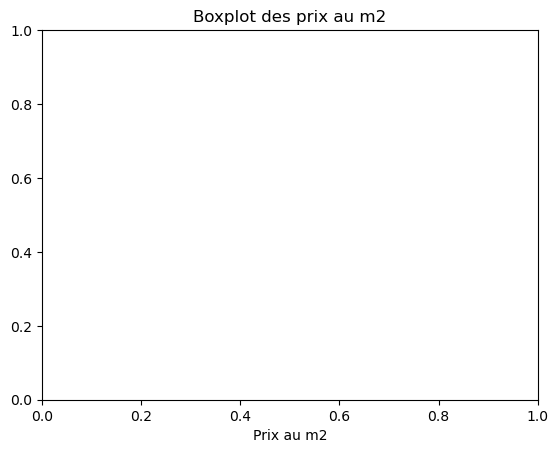

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_immo['Prix_m2'])
plt.title("Boxplot des prix au m2")
plt.xlabel("Prix au m2")
plt.show();

In [104]:
# remplacer les valeurs aberrantes
Q1 = df_immo['Prix_m2'].quantile(0.25)
Q3 = df_immo['Prix_m2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_immo.loc[df_immo['Prix_m2'] > upper_bound, 'Prix_m2'] = df_immo['Prix_m2'].median()
df_immo.loc[df_immo['Prix_m2'] < lower_bound, 'Prix_m2'] = df_immo['Prix_m2'].median()

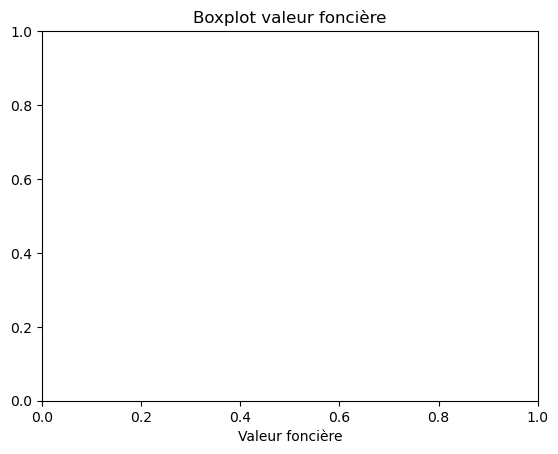

In [105]:
sns.boxplot(x=df_immo['Valeur_fonciere'])
plt.title("Boxplot valeur foncière")
plt.xlabel("Valeur foncière")
plt.show();

In [106]:
# remplacer les valeurs aberrantes
Q1 = df_immo['Valeur_fonciere'].quantile(0.25)
Q3 = df_immo['Valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_immo.loc[df_immo['Valeur_fonciere'] > upper_bound, 'Valeur_fonciere'] = df_immo['Valeur_fonciere'].median()
df_immo.loc[df_immo['Valeur_fonciere'] < lower_bound, 'Valeur_fonciere'] = df_immo['Valeur_fonciere'].median()

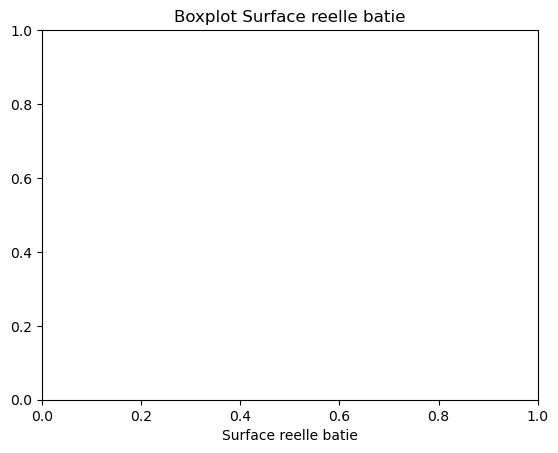

In [107]:
sns.boxplot(x=df_immo['Surface_reelle_bati'])
plt.title("Boxplot Surface reelle batie")
plt.xlabel("Surface reelle batie")
plt.show();

In [108]:
# remplacer les valeurs aberrantes
Q1 = df_immo['Surface_reelle_bati'].quantile(0.25)
Q3 = df_immo['Surface_reelle_bati'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_immo.loc[df_immo['Surface_reelle_bati'] > upper_bound, 'Surface_reelle_bati'] = df_immo['Surface_reelle_bati'].median()
df_immo.loc[df_immo['Surface_reelle_bati'] < lower_bound, 'Surface_reelle_bati'] = df_immo['Surface_reelle_bati'].median()

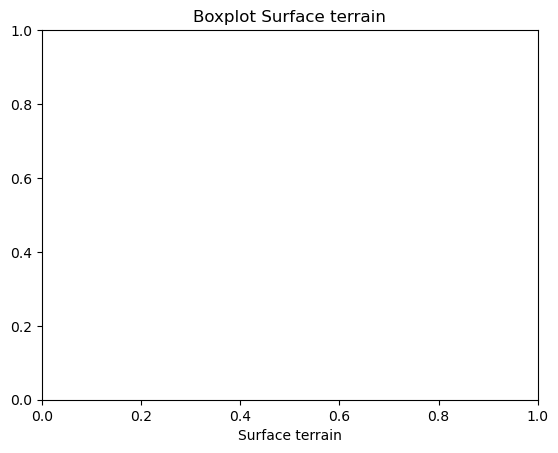

In [109]:
sns.boxplot(x=df_immo['Surface_terrain'])
plt.title("Boxplot Surface terrain")
plt.xlabel("Surface terrain")
plt.show();

In [110]:
# remplacer les valeurs aberrantes
Q1 = df_immo['Surface_terrain'].quantile(0.25)
Q3 = df_immo['Surface_terrain'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_immo.loc[df_immo['Surface_terrain'] > upper_bound, 'Surface_terrain'] = df_immo['Surface_terrain'].median()
df_immo.loc[df_immo['Surface_terrain'] < lower_bound, 'Surface_terrain'] = df_immo['Surface_terrain'].median()

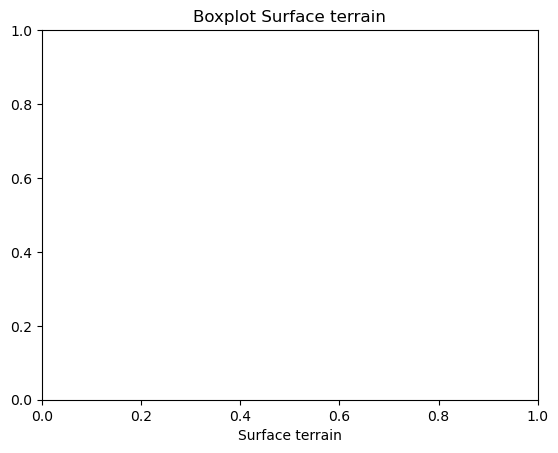

In [111]:
sns.boxplot(x=df_immo['Surface_terrain'])
plt.title("Boxplot Surface terrain")
plt.xlabel("Surface terrain")
plt.show();

# 4. Description des données (visualisations)

In [112]:
import numpy as np
df_immo = df_immo[~np.isinf(df_immo['Prix_m2'])]

In [113]:
# description des données
df_immo.describe()

,index,Identifiant_de_document,Date_mutation,Valeur_fonciere,No_voie,Code_postal,Code_commune,No_plan,Nombre_de_lots,Code_type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Annee,Prix_m2
count,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


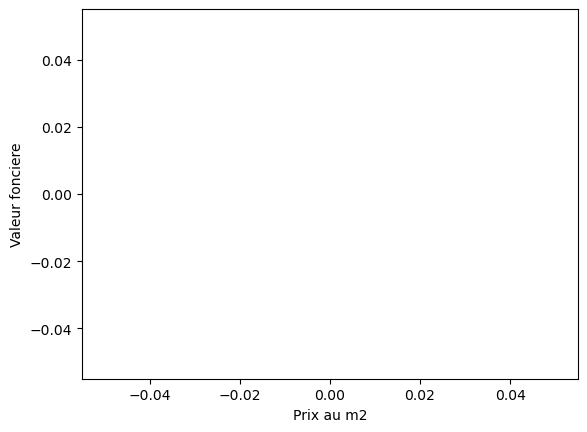

In [114]:
sns.scatterplot(data=df_immo, x="Prix_m2", y="Valeur_fonciere")
plt.xlabel("Prix au m2")
plt.ylabel("Valeur fonciere")
plt.show;

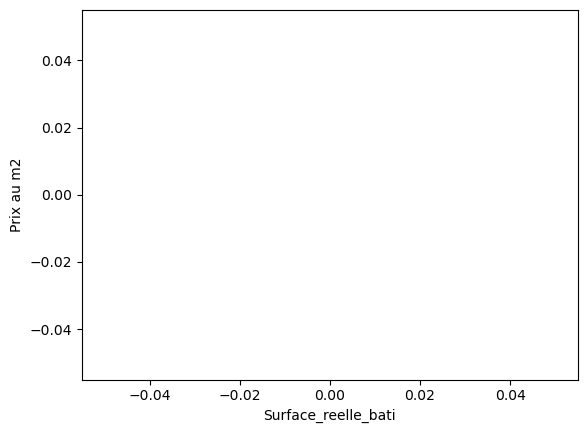

In [115]:
sns.scatterplot(data=df_immo, x="Surface_reelle_bati", y="Prix_m2")
plt.xlabel("Surface_reelle_bati")
plt.ylabel("Prix au m2")
plt.show;

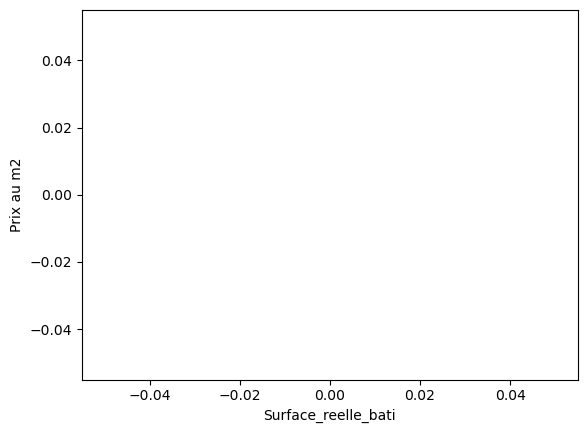

In [116]:
sns.scatterplot(data=df_immo, x="Surface_reelle_bati", y="Prix_m2")
plt.xlabel("Surface_reelle_bati")
plt.ylabel("Prix au m2")
plt.show;

In [117]:
dico = {'S': 'Sols', 'P': 'Prés', 'AG': "Terrains d’agrément", 'T': 'Terres', 'J': 'Jardins', 'AB': "Terrains à bâtir", 'VI': 'Vignes', 'L': 'Landes', 'BT': 'Taillis simples', 
        'CH': 'Chemins de fer, Canaux de Navigation', 'E': 'Eaux', 'PA': 'Pâtures ou Pâturages', 'BP': 'Peupleraies', 'BS': 'Taillis sous Futaies', 'VE': 'Vergers', 
        'PP': 'Prés, Pâtures ou Herbages plantes', 'BR': 'Futaies résineuses', 'B': 'Bois', 'BF': 'Futaies Feuillues', 'CA': 'Carrières', 'PC': 'Pacages ou Pâtis', 
        'BO': 'Oseraies', 'BM': 'Futaies Mixtes', 'PE': "Prés d’embouche", 'PH': 'Herbages', 'LB': 'Landes Boisées', 'TP': 'Terres plantées'}

df_immo['Nature_culture'] = df_immo['Nature_culture'].replace(dico)

In [118]:
df_immo.shape

(0, 25)

In [119]:
df_immo['Prix_m2'].max()

nan

In [120]:
df_immo.to_csv("df_immo.csv")